In [1623]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1624]:
# Load the pre-extracted features from the .npy files into separate arrays
# actor1_features = np.load('features_countvec/train_countvec_features_actor_1_name.npy')
# actor2_features = np.load('features_countvec/train_countvec_features_actor_2_name.npy')
# director_features = np.load('features_countvec/train_countvec_features_director_name.npy')
# plot_features = np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy')
# title_features = np.load('features_fasttext/train_fasttext_title_embeddings.npy')

In [1625]:
# Concatenate the features
df = pd.read_csv('train_dataset.csv')
# df = pd.concat((df, pd.DataFrame(actor1_features), pd.DataFrame(actor2_features), pd.DataFrame(director_features), pd.DataFrame(plot_features), pd.DataFrame(title_features)), axis=1)
df.columns = df.columns.astype(str)
df = df.drop(['director_name', 'genres', 'actor_1_name', 'actor_2_name', 'plot_keywords', 'movie_title', 'actor_3_name', 'language', 'country', 'content_rating', 'title_embedding'], axis=1)
df

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
0,1,186,73,28,847,2000,422783777,644348,6458,0,656,1994,886,17000,0.001576,4
1,2,252,97,0,233,654,20433940,78883,1876,8,662,2005,529,0,0.000675,2
2,3,232,117,234,221,12000,371897,36494,13607,2,118,2013,1000,11000,0.003002,2
3,4,297,109,0,145,957,13782838,258078,1757,0,911,1982,163,23000,0.001726,4
4,5,297,171,0,857,16000,313837577,1238746,22342,2,5060,2001,5000,21000,0.001876,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,3000,161,129,42,49,97,93952276,132048,318,7,203,2009,50,12000,0.000750,2
3000,3001,393,123,2000,471,26000,26903709,312629,37206,0,475,2013,10000,83000,0.003302,4
3001,3002,216,118,473,963,18000,73343413,217480,22517,0,429,2009,1000,21000,0.003302,3
3002,3003,109,95,0,0,227,1060591,9750,231,0,66,2007,4,0,0.000300,3


In [1626]:
df.isnull().sum()

id                           0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
average_degree_centrality    0
imdb_score_binned            0
dtype: int64

In [1627]:
df.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
count,3004.00000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3.004000e+03,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,1502.50000,165.609188,110.076565,778.890146,767.860186,7654.935752,5.187733e+07,1.049017e+05,11391.643808,1.380826,335.922770,2002.782956,1992.843209,8972.179427,0.001739,2.250333
std,867.32443,121.254549,21.910608,2990.741946,1901.991202,16488.761947,6.840156e+07,1.508573e+05,20044.723195,2.093417,415.219466,10.086250,4651.072554,19853.888300,0.001183,0.691451
min,1.00000,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,1929.000000,0.000000,0.000000,0.000300,0.000000
25%,751.75000,76.000000,96.000000,10.000000,191.000000,728.500000,8.579684e+06,1.897825e+04,1873.000000,0.000000,108.000000,1999.000000,377.750000,0.000000,0.000825,2.000000
50%,1502.50000,137.000000,106.000000,62.500000,433.000000,1000.000000,3.020586e+07,5.387400e+04,3889.000000,1.000000,208.000000,2004.000000,664.000000,241.000000,0.001426,2.000000
75%,2253.25000,223.000000,120.000000,234.000000,683.000000,12000.000000,6.647359e+07,1.284895e+05,15925.250000,2.000000,398.000000,2010.000000,970.000000,11000.000000,0.002401,3.000000
max,3004.00000,813.000000,330.000000,23000.000000,23000.000000,640000.000000,6.586723e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,197000.000000,0.007354,4.000000


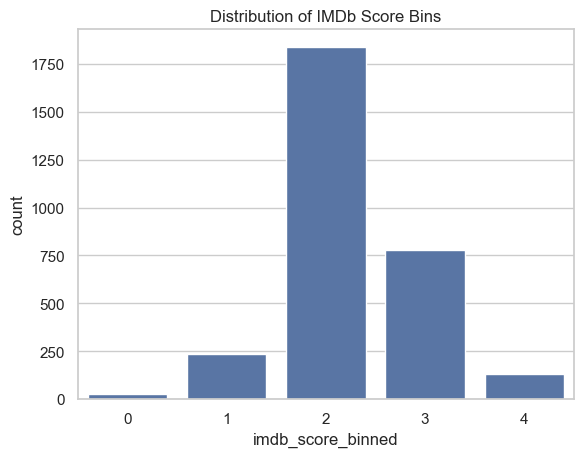

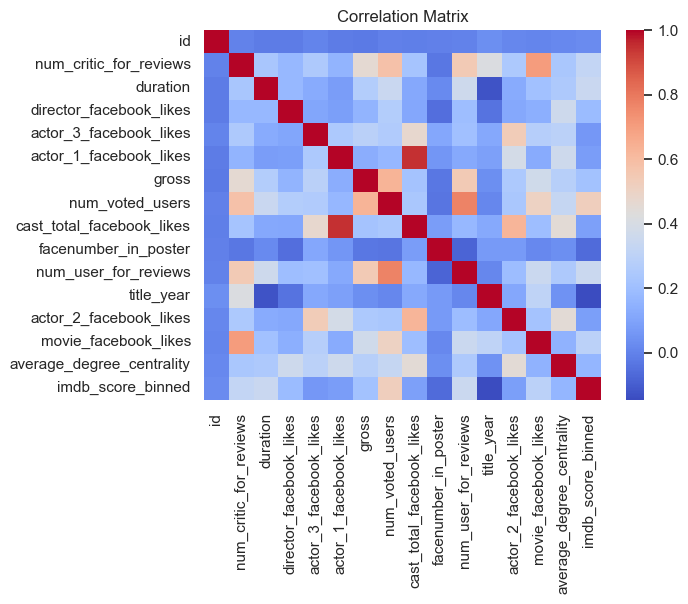

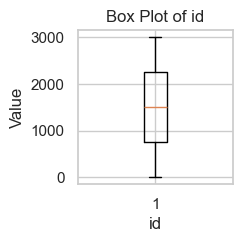

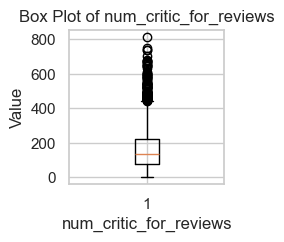

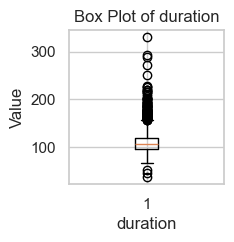

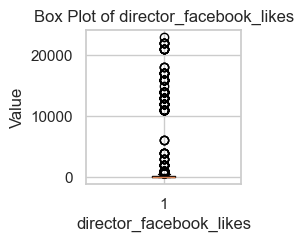

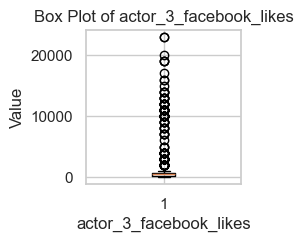

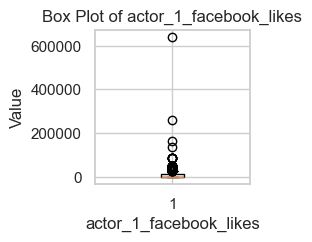

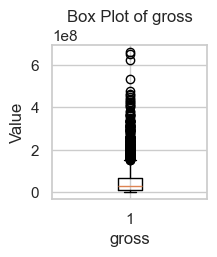

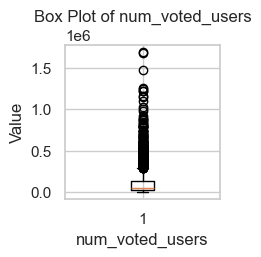

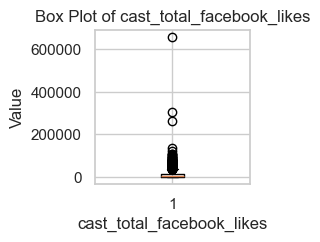

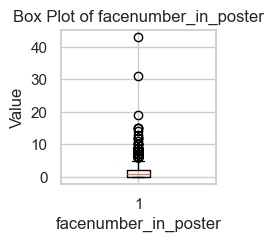

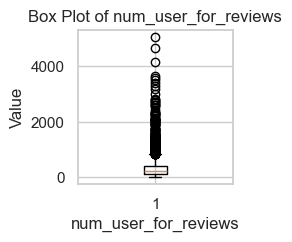

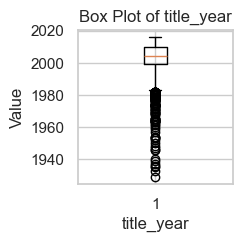

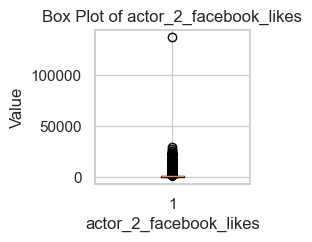

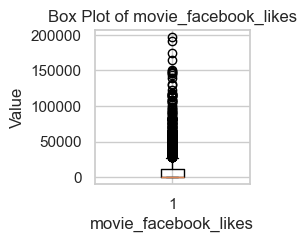

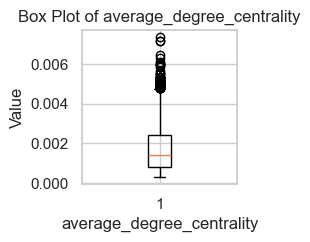

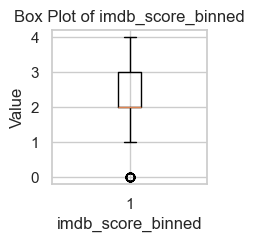

In [1628]:
# Histogram of IMDb score binned
sns.countplot(x='imdb_score_binned', data=df)
plt.title('Distribution of IMDb Score Bins')
plt.show()

# Heatmap of correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

for feature in df.columns:
  if pd.api.types.is_numeric_dtype(df[feature]):
    plt.figure(figsize=(2, 2))
    plt.boxplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Value")
    plt.title(f"Box Plot of {feature}")
    plt.show()

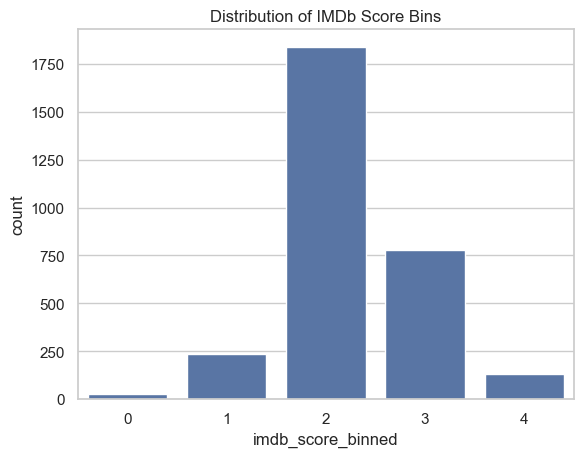

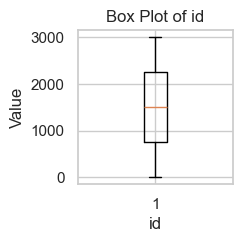

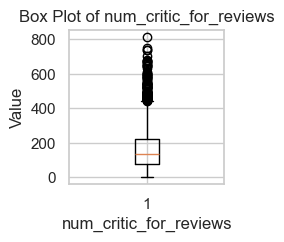

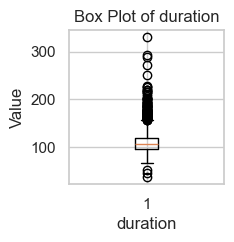

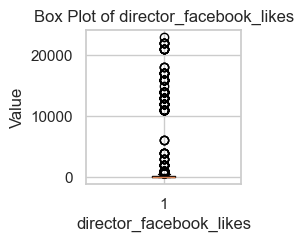

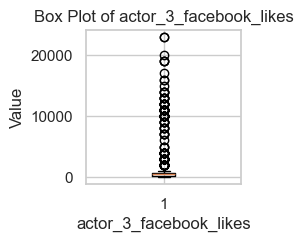

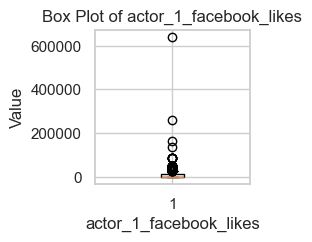

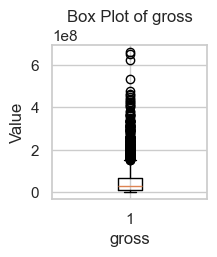

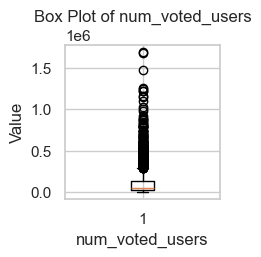

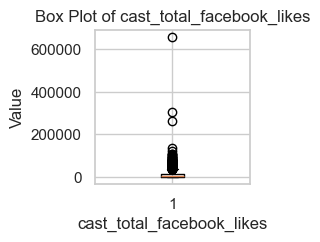

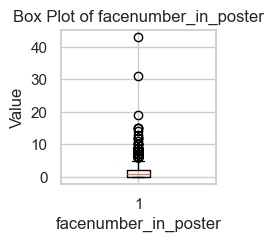

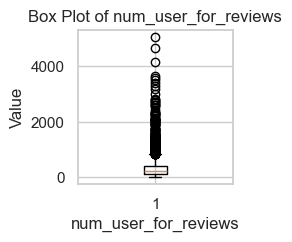

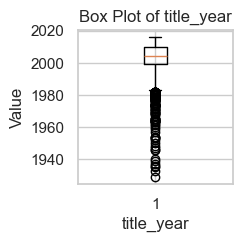

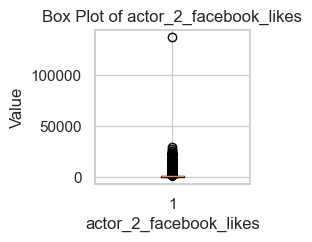

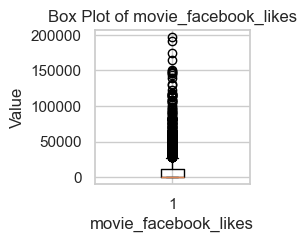

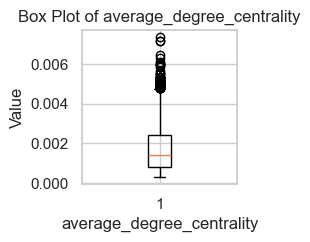

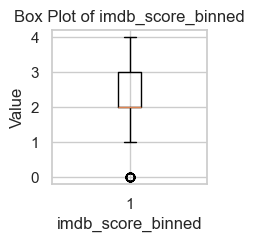

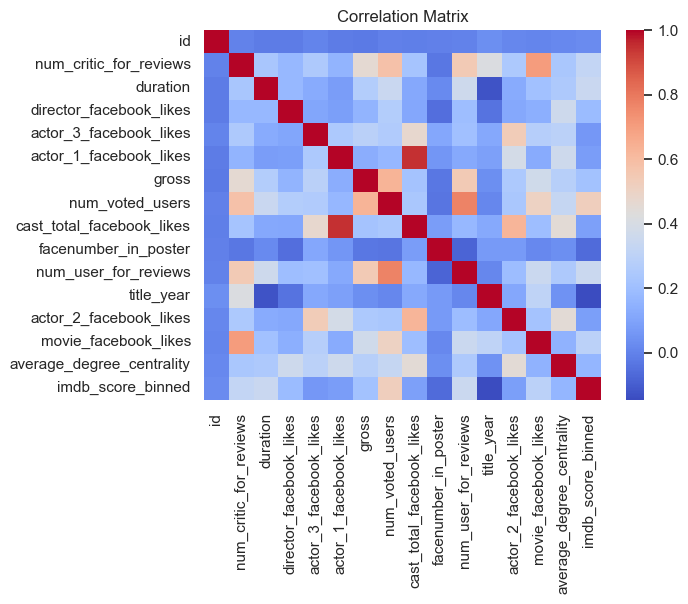

In [1629]:
# Histogram of IMDb score binned
sns.countplot(x='imdb_score_binned', data=df)
plt.title('Distribution of IMDb Score Bins')
plt.show()

for feature in df.columns:
  if pd.api.types.is_numeric_dtype(df[feature]):
    plt.figure(figsize=(2, 2))
    plt.boxplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Value")
    plt.title(f"Box Plot of {feature}")
    plt.show()

# Heatmap of correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1630]:
test_df = pd.read_csv('test_dataset.csv')

# actor1_features = np.load('features_countvec/test_countvec_features_actor_1_name.npy')
# actor2_features = np.load('features_countvec/test_countvec_features_actor_2_name.npy')
# director_features = np.load('features_countvec/test_countvec_features_director_name.npy')
# plot_features = np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy')
# title_features = np.load('features_fasttext/test_fasttext_title_embeddings.npy')

# test_df = pd.concat((test_df, pd.DataFrame(actor1_features), pd.DataFrame(actor2_features), pd.DataFrame(director_features), pd.DataFrame(plot_features), pd.DataFrame(title_features)), axis=1)
test_df.columns = test_df.columns.astype(str)
test_df = test_df.drop(['director_name', 'genres', 'actor_1_name', 'actor_2_name', 'plot_keywords', 'movie_title', 'actor_3_name', 'language', 'country', 'content_rating', 'title_embedding'], axis=1)

In [1631]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler to the training data and transform both datasets
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_test_scaled = scaler.transform(test_df)

In [1632]:
# Split the dataset into features (X) and target (y)
X = df.drop('imdb_score_binned', axis=1)
y = df['imdb_score_binned']
X_weighted = df.drop('imdb_score_binned', axis=1)
y_weighted = df['imdb_score_binned']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1003)
X_train_weighted, X_val_weighted, y_train_weighted, y_val_weighted = train_test_split(X_weighted, y_weighted, test_size=0.3, random_state=1003)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both datasets
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train_weighted = scaler.transform(X_train_weighted)
X_val_weighted = scaler.transform(X_val_weighted)
X_test = scaler.transform(test_df)

In [1633]:
# # Initialize the Naive Bayes classifier
# nb = MultinomialNB()

# # Train the model on the training data
# nb.fit(X_train + abs(X_train.min()), y_train)

# # Make predictions on the test data
# y_pred = nb.predict(X_val + abs(X_val.min()))

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_val, y_pred))

In [1634]:
# # Initialize the k-NN classifier with k=40
# knn = KNeighborsClassifier(n_neighbors=40)

# # Train the model on the training data
# knn.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = knn.predict(X_val)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_val, y_pred))

In [1635]:
# Initialize the SVM classifier
svm = SVC(random_state=1003)

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6917960088691796


In [1636]:
# Initialize the SVM classifier
svm_balanced = SVC(random_state=1003, class_weight='balanced')

# Train the model on the training data
svm_balanced.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_balanced.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.4024390243902439


In [1637]:
# # Initialize the Neural Network classifier
# nn = MLPClassifier(random_state=1003, alpha=0.0601)

# # Train the model on the training data
# nn.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = nn.predict(X_val)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_val, y_pred))

In [1638]:
# # Define the alpha values to try
# alphas = [0.0001 + 0.005 * i for i in range(20)]

# # Loop through each alpha value
# for alpha in alphas:
# 	# Initialize the Neural Network classifier with the current alpha
# 	nn = MLPClassifier(random_state=1003, alpha=alpha)
	
# 	# Train the model on the training data
# 	nn.fit(X_train, y_train)
	
# 	# Make predictions on the test data
# 	y_pred = nn.predict(X_test)
	
# 	# Evaluate the model
# 	accuracy = accuracy_score(y_test, y_pred)
	
# 	# Print the alpha value and accuracy
# 	print(f"Alpha: {alpha:.5f}, Accuracy: {accuracy:.7f}")

In [1639]:
# from sklearn.linear_model import SGDClassifier

# # Initialize the SGD Classifier with L1 regularization
# sgd = SGDClassifier(loss='log_loss', penalty='l1', max_iter=1000, random_state=1003)

# # Train the model on the training data
# sgd.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = sgd.predict(X_val)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_val, y_pred))

In [1640]:
# # Initialize the Logistic Regression classifier
# lr = LogisticRegression(random_state=1003, penalty=None)

# # Train the model on the training data
# lr.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = lr.predict(X_val)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_val, y_pred))

In [1641]:
# # Initialize the Ridge Classifier
# rc = RidgeClassifier(random_state=1003)

# # Train the model on the training data
# rc.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = rc.predict(X_val)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_val, y_pred))

In [1642]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=18,
    max_depth=17,
    random_state=1003,
)

# Train the model on the training data
rf.fit(X_train_weighted, y_train_weighted)

# Make predictions on the test data
y_pred = rf.predict(X_val_weighted)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.6995565410199557


In [1643]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=18,
    max_depth=17,
    random_state=1003,
)

# Train the model on the training data
rf.fit(X_train_weighted, y_train_weighted)

# Make predictions on the test data
y_pred = rf.predict(X_val_weighted)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.7106430155210643


In [1644]:
# # Initialize the Decision Tree classifier
# dt = DecisionTreeClassifier(random_state=1003)

# # Train the model on the training data
# dt.fit(X_train_weighted, y_train_weighted)

# # Make predictions on the test data
# y_pred = dt.predict(X_val_weighted)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

In [1645]:
# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=1003, n_estimators=45)

# Train the model on the training data
gb.fit(X_train_weighted, y_train_weighted)

# Make predictions on the test data
y_pred = gb.predict(X_val_weighted)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.7217294900221729


In [1646]:
# Initialize the AdaBoost classifier
ada = AdaBoostClassifier(
    estimator=rf,
    n_estimators=18,
    random_state=1003,
    algorithm='SAMME'
)

# Train the model on the training data
ada.fit(X_train_weighted, y_train_weighted)

# Make predictions on the test data
y_pred = ada.predict(X_val_weighted)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.6962305986696231


In [1647]:
from sklearn.ensemble import VotingClassifier
models = [('rf', rf), ('gb', gb), ('svm', svm), ('ada', ada)]

# Create a VotingClassifier ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')

# Train the ensemble on your data
ensemble.fit(X_train, y_train)

# Make predictions on your test data
y_pred = ensemble.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7117516629711752


In [1648]:
# from sklearn.model_selection import cross_val_score
# models = {"SVM" : svm, "Random Forest" : rf, "Gradient Boosting" : gb, "AdaBoost" : ada, "Ensemble" : ensemble}
# for model_name, model in models.items():
#     cv_scores = cross_val_score(model, X_train, y_train, cv=8)
#     print(f"{model_name} Cross-Validation Scores: {cv_scores}")
#     print(f"{model_name} Mean CV Accuracy: {cv_scores.mean()}")
#     print(f"{model_name} Standard Deviation of Accuracy: {cv_scores.std()}\n")

In [1649]:
df = pd.read_csv('train_dataset.csv')
# df = pd.concat((df, pd.DataFrame(actor1_features), pd.DataFrame(actor2_features), pd.DataFrame(director_features), pd.DataFrame(plot_features), pd.DataFrame(title_features)), axis=1)
df.columns = df.columns.astype(str)
df_x = df.drop(['director_name', 'genres', 'actor_1_name', 'actor_2_name', 'plot_keywords', 'movie_title', 'actor_3_name', 'language', 'country', 'content_rating', 'title_embedding', 'imdb_score_binned'], axis=1)
df_x.fillna(df_x.median(), inplace=True)
df_y = df['imdb_score_binned']
df_x = scaler.transform(df_x)

In [1650]:
whole_accuracy_scores = [
    accuracy_score(df_y, svm.predict(df_x)),  # SVM
    accuracy_score(df_y, rf.predict(df_x)),  # Random Forest
    accuracy_score(df_y, gb.predict(df_x)),  # Gradient Boosting
    accuracy_score(df_y, ada.predict(df_x)),  # AdaBoost Classifier
    accuracy_score(df_y, ensemble.predict(df_x)), # Ensemble Classifier
]

train_accuracy_scores = [
    accuracy_score(y_train, svm.predict(X_train)),  # SVM
    accuracy_score(y_train, rf.predict(X_train)),  # Random Forest
    accuracy_score(y_train, gb.predict(X_train)),  # Gradient Boosting
    accuracy_score(y_train, ada.predict(X_train)),  # AdaBoost Classifier
    accuracy_score(y_train, ensemble.predict(X_train)), # Ensemble Classifier
]

test_accuracy_scores = [
    accuracy_score(y_val, svm.predict(X_val)),  # SVM
    accuracy_score(y_val, rf.predict(X_val)),  # Random Forest
    accuracy_score(y_val, gb.predict(X_val)),  # Gradient Boosting
    accuracy_score(y_val, ada.predict(X_val)),  # AdaBoost Classifier
    accuracy_score(y_val, ensemble.predict(X_val)), # Ensemble Classifier
]

# Create a dictionary to store the model names and their accuracies
model_accuracies = {
    "Model": ["SVM", "Random Forest", "Gradient Boosting", "AdaBoost Classifier", "Ensemble Classifier"],
    "Train Accuracy": train_accuracy_scores,
    "Validate Accuracy": test_accuracy_scores,
    "Overall Accuracy": whole_accuracy_scores,
}

# Create the DataFrame
df_models = pd.DataFrame(model_accuracies)
df_models

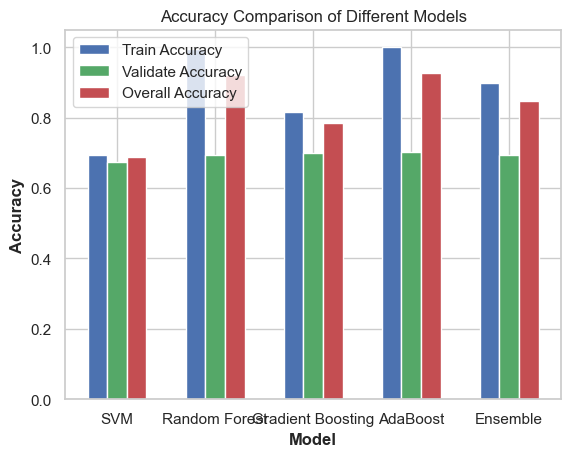

In [ ]:
# Accuracy scores for each model
model_names = ["SVM", "Random Forest", "Gradient Boosting", "AdaBoost", "Ensemble"]
# train_accuracy_scores = [0.690771, 0.996194, 0.881541, 1.000000, 0.890105]
# validate_accuracy_scores = [0.691796, 0.703991, 0.721729, 0.708426, 0.715078]
# df_accuracy_scores = [0.691079, 0.908455, 0.833555, 0.912450, 0.837550]

# Set position of bar on X axis
r1 = np.arange(len(train_accuracy_scores))
r2 = [x + 0.2 for x in r1]
r3 = [x + 0.2 for x in r2]

# Make the plot
plt.bar(r1, train_accuracy_scores, color='b', width=0.2, label='Train Accuracy')
plt.bar(r2, test_accuracy_scores, color='g', width=0.2, label='Validate Accuracy')
plt.bar(r3, whole_accuracy_scores, color='r', width=0.2, label='Overall Accuracy')

# Add labels, title, and legend
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison of Different Models')
plt.xticks([r + 0.2 for r in range(len(train_accuracy_scores))], model_names)
plt.legend()

# Show the plot
plt.show()

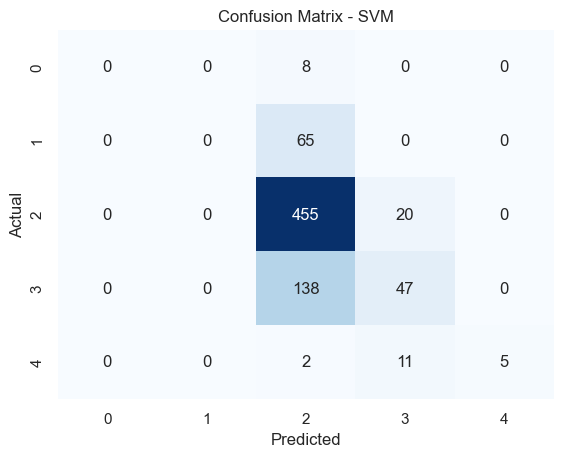

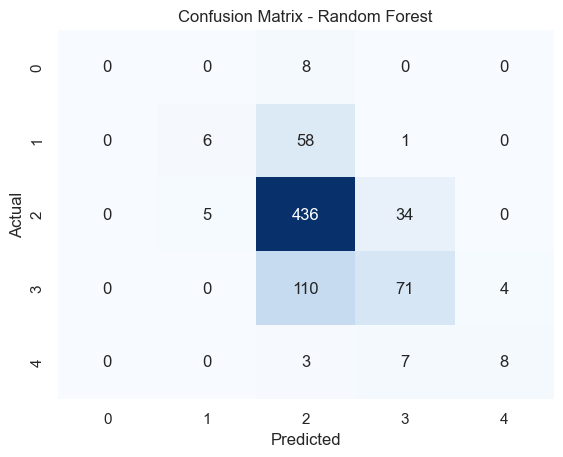

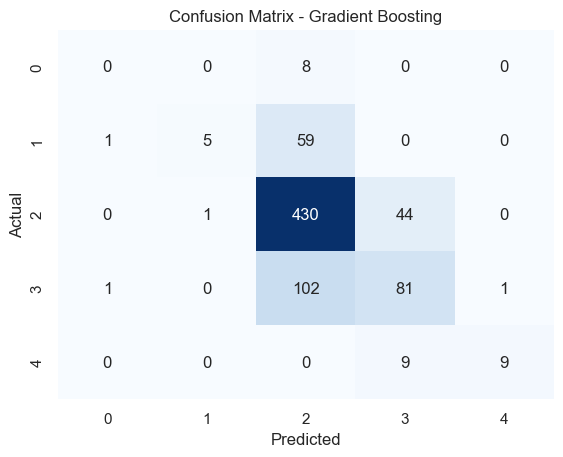

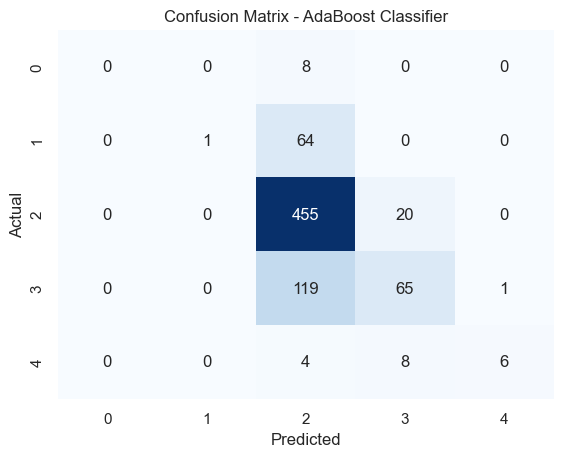

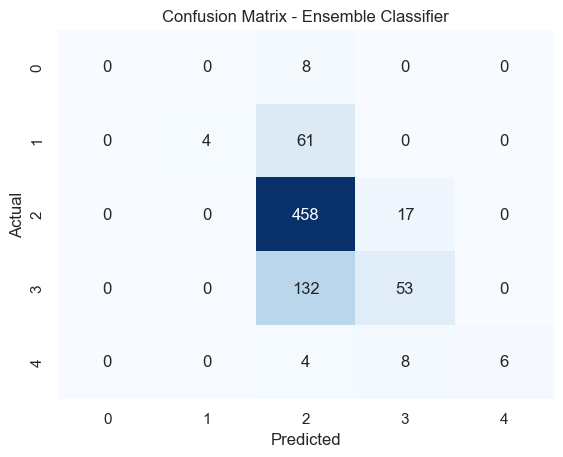

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Generate confusion matrices for the validation set
y_val_pred_svm = svm.predict(X_val)
y_val_pred_rf = rf.predict(X_val)
y_val_pred_gb = gb.predict(X_val)
y_val_pred_ada = ada.predict(X_val)
y_val_pred_ensemble = ensemble.predict(X_val)

# Plot confusion matrices
plot_confusion_matrix(y_val, y_val_pred_svm, "Confusion Matrix - SVM")
plot_confusion_matrix(y_val, y_val_pred_rf, "Confusion Matrix - Random Forest")
plot_confusion_matrix(y_val, y_val_pred_gb, "Confusion Matrix - Gradient Boosting")
plot_confusion_matrix(y_val, y_val_pred_ada, "Confusion Matrix - AdaBoost Classifier")
plot_confusion_matrix(y_val, y_val_pred_ensemble, "Confusion Matrix - Ensemble Classifier")

In [ ]:
import os
if os.path.isfile("submission.csv"):
    os.remove("submission.csv")

chosen_model = gb

# Make predictions on the test data
test_pred = chosen_model.predict(X_test)

# Assuming the test_df has an 'id' column for submission
submission = pd.DataFrame({'id': test_df['id'], 'imdb_score_binned': test_pred})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Save the submission file

submission.to_csv('submission.csv', index=False)
submission

,id,imdb_score_binned
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2
...,...,...
747,748,3
748,749,2
749,750,2
750,751,2
